In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
from scipy.spatial.distance import euclidean as eu
from scipy.spatial.distance import cosine 
import math
from scipy import signal

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing

In [2]:
D_path = glob.glob('Data\Dyslexic' + "\*")
C_path = glob.glob('Data\Control' + "\*")

C_data = []
for path in C_path:
    temp = pd.read_csv(path)
    temp = temp.drop('Unnamed: 0',axis = 1)
    C_data.append(temp)

D_data = []
for path in D_path:
    temp = pd.read_csv(path)
    temp = temp.drop('Unnamed: 0',axis = 1)
    D_data.append(temp)
    
C_new = []
for data in C_data:
    X =data[['LX','RX']]
    Y =data[['LY','RY']]
    Xm = X.mean(axis=1)
    Ym = Y.mean(axis=1)
    f = pd.DataFrame([data.iloc[:,0],Xm,Ym])
    f = f.transpose()
    f = f.rename(columns = {'Unnamed 0': 'X', 'Unnamed 1': 'Y'})
    C_new.append(f)

D_new = []
for data in D_data:
    X =data[['LX','RX']]
    Y =data[['LY','RY']]
    Xm = X.mean(axis=1)
    Ym = Y.mean(axis=1)
    f = pd.DataFrame([data.iloc[:,0],Xm,Ym])
    f = f.transpose()
    f = f.rename(columns = {'Unnamed 0': 'X', 'Unnamed 1': 'Y'})
    D_new.append(f)

In [3]:


for i in range(len(C_new)):
    C_tempx = np.abs(C_new[i]['X'])
    mx = max(C_tempx)
    C_tempy = np.abs(C_new[i]['Y'])
    my= max(C_tempy)
    C_new[i]['X'] = C_new[i]['X']/np.abs(mx)
    C_new[i]['Y'] = C_new[i]['Y']/np.abs(my)
for i in range(len(D_new)):
    D_tempx = np.abs(D_new[i]['X'])
    mx = max(D_tempx)
    D_tempy = np.abs(D_new[i]['Y'])
    my= max(D_tempy)
    D_new[i]['X'] = D_new[i]['X']/np.abs(mx)
    D_new[i]['Y'] = D_new[i]['Y']/np.abs(my)    

In [4]:
C_cmx = []
C_real= []
C_img=[]
for j in range(len(C_new)):
    dat = C_new[j]
    x = dat['X']
    y = dat['Y']
    t = dat['T']
    
    z=[]
    x_in=[]
    y_in=[]
    for i in range(0,x.size):
        z.append(complex(x[i],y[i]))
        x_in.append(x[i])
        y_in.append(y[i])
    
    
    C_cmx.append(z)
    C_real.append(x_in)
    C_img.append(y_in)

D_cmx = []
D_real= []
D_img=[]
for j in range(len(D_new)):
    dat = D_new[j]
    x = dat['X']
    y = dat['Y']
    t = dat['T']
    
    z=[]
    x_in=[]
    y_in=[]
    for i in range(0,x.size):
        z.append(complex(x[i],y[i]))
        x_in.append(x[i])
        y_in.append(y[i])
    D_cmx.append(z)
    D_real.append(x_in)
    D_img.append(y_in)

In [5]:
#Stamdard STFT Run. Returns Full Flattened Vector
def stft_run(n_ratio,o_ratio):
    C_spec = []
    vec= []
    for j in range(len(tmat)):
        data = tmat[j]
        L= len(data)+1
        k = int((len(data) + 1)/250) # k varies from 4 to 8
        N=20
        B  = L/n_ratio
        E =B/o_ratio#round((N*B - L)/(N-1))
        nf = 2000/n_ratio
        f, t, Zxx = signal.stft(tmat[j],fs= L/250, nperseg=B,noverlap= E,nfft=nf)
        
        tot = np.abs(Zxx)**2
        
        
        C_spec.append(np.abs(Zxx)**2)
    
    vec = []
    for i in range(len(C_spec)):
        vec.append(C_spec[i])
    print(C_spec[i].shape)
    
    for i in range(len(C_spec)):
        vec[i]=vec[i].flatten()
    
    

    return vec

In [6]:
#Considers Bins till 'lim'. Returns flattened vector for only some bins
def stft_run_half(n_ratio,o_ratio,lim1,lim2):
    lim1= int(lim1)
    lim2= int(lim2)
    C_spec = []
    vec= []
    for j in range(len(tmat)):
        data = tmat[j]
        L= len(data)+1
        k = int((len(data) + 1)/250) # k varies from 4 to 8
        N=20
        B  = L/n_ratio
        E =B/o_ratio#round((N*B - L)/(N-1))
        nf = 2000/n_ratio
        f, t, Zxx = signal.stft(tmat[j],fs= L/250, nperseg=B,noverlap= E,nfft=nf)
        
        tot = np.abs(Zxx)**2
        half_im=[]
        for i in range(len(tot)):
            half_im.append(tot[i][lim1:lim2])
            #print(len(tot[i]))
        
        C_spec.append(np.asarray(half_im))
    
    vec = []
    for i in range(len(C_spec)):
        vec.append(C_spec[i])
    #print(C_spec[i].shape)
    
    for i in range(len(C_spec)):
        vec[i]=vec[i].flatten()
    
    

    return vec

In [38]:
#Flattened vector depending on frequency
def stft_run_freq(n_ratio,o_ratio,lim1,lim2):
    lim1= int(lim1)
    lim2= int(lim2)
    C_spec = []
    vec= []
    for j in range(len(tmat)):
        data = tmat[j]
        L= len(data)+1
        k = int((len(data) + 1)/250) # k varies from 4 to 8
        N=20
        B  = L/n_ratio
        E =B/o_ratio#round((N*B - L)/(N-1))
        nf = 2000/n_ratio
        f, t, Zxx = signal.stft(tmat[j],fs= L/250, nperseg=B,noverlap= E,nfft=nf)
        
        tot = np.abs(Zxx)**2
        
        
        C_spec.append(np.abs(Zxx)**2)
    
    vec = []
    for i in range(len(C_spec)):
        vec.append(C_spec[i])
    print(C_spec[i].shape)
    
    factor = len(C_spec[i][3])
    l1= factor*lim1
    l2 = factor*lim2
    print(l1,l2)
    lfvec =[]
    hfvec =[]
    fvec=[]
    for i in range(len(C_spec)):
        x=vec[i].flatten()
        #print(len(x))
        #lfvec.append(x[:lim])
        #hfvec.append(x[lim:])
        fvec.append(x[l1:l2])
    
    

    return fvec

## Preparing Data
This will be passed into all the stft functions

In [8]:
tmat=[]
for i in range(88):
    tmat.append(C_cmx[i])
for i in range(98):
    tmat.append(D_cmx[i])



In [9]:
#Labelling signals of different lengths
ylen=[]
for s in tmat:
    if(len(s)>1750):
        ylen.append(4)
    elif(len(s)>1500):
        ylen.append(3)
    elif(len(s)>1250):
        ylen.append(2)
    elif(len(s)>1000):
        ylen.append(1)
    else:
        ylen.append(0)

## Output function:
Prints the accuracy score. <br/>
Plots the distances of each point from the separating plane. <br/>
Returns the list of all distances

In [10]:
#Final Testing result
def final(X_train,y_train,X,y):
    
    clf.fit(X_train, y_train)
    ht = clf.decision_function(X)
    x = range(len(y))
    fig, ax = plt.subplots()
    ax.scatter(x,ht,c = ylen)
    ax.axvline(x=88, color='b', linestyle='-')
    ax.axhline(y=0, color='r', linestyle='-')
    print(clf.score(X,y))
    return ht

## Split Train and Test Data for the experiments

In [11]:
#Training testing data based on fixed index defined signals
def create_train_test(X,index):
    X_train=[]
    X_test=[]
    y_train=[]
    y_test=[]
    index_test =[]
    index_train=index
    for i in range(len(X)):
        if i in index_train:
            X_train.append(X[i])
            y_train.append(y[i])
        else:
            X_test.append(X[i])
            y_test.append(y[i])
            index_test.append(i)
    return X_train, X_test,y_train,y_test,index_train,index_test
        

In [12]:
def add_num(ind):
    r=random.randint(0,186)
    if r not in ind:
        ind.append(r)
    else:
        add_num(ind)

## Get misclassified points

In [13]:
def get_misclassified(res):
    WrongClass=[]
    for i in range(88):
        if(res[i]<0):
            WrongClass.append([i,ylen[i]])
    for i in range(88,186):
        if(res[i]>0):
            WrongClass.append([i,ylen[i]])
    return WrongClass
    
    

In [14]:
def misc_pts(misc):
    dp=[]
    for i in misc:
        dp.append(i[0])
    print(dp)

In [21]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
clf = Perceptron(tol=1e-3, random_state=0)
y= np.concatenate((np.ones(88), np.zeros(98)))

In [16]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)

In [17]:
import random
index=[]
for i in range(130):
    add_num(index)

In [18]:
len(index)

130

In [26]:
vec = stft_run(125,2)
X = np.asarray(vec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
accuracy_score(y, y_km)

C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


(16, 251)


0.521505376344086

In [27]:
X.shape

(186, 4016)

0.9086021505376344


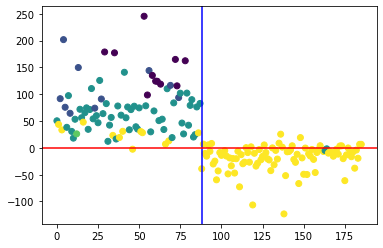

In [28]:
res = final(X_train,y_train,X,y)

In [24]:
misc1 = get_misclassified(res)

## Partial Bins

In [25]:
#First half bins
vec = stft_run_half(125,2,0,125)
X = np.asarray(vec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
accuracy_score(y, y_km)

C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


0.4946236559139785

In [26]:
X.shape

(186, 2000)

0.946236559139785


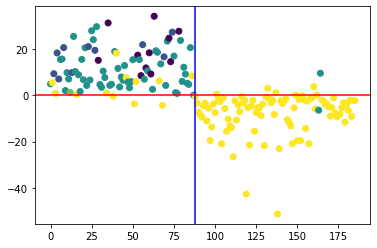

In [28]:
res = final(X_train,y_train,X,y)

In [31]:
misc2_half = get_misclassified(res)

In [32]:
#Second Half Bins
vec = stft_run_half(125,2,125,251)
X = np.asarray(vec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
accuracy_score(y, y_km)

C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


0.4838709677419355

0.967741935483871


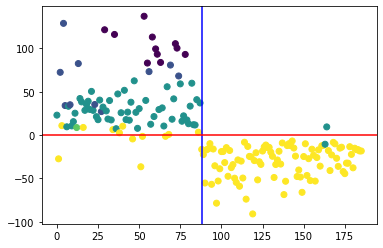

In [33]:
res = final(X_train,y_train,X,y)

In [34]:
misc2_half_r = get_misclassified(res)

In [35]:
#First 25% (Q1) Bin
vec = stft_run_half(125,2,0,63)
X = np.asarray(vec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
accuracy_score(y, y_km)

C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


0.4946236559139785

0.9516129032258065


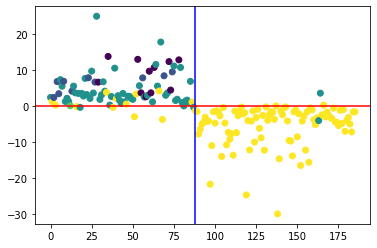

In [36]:
res = final(X_train,y_train,X,y)

In [37]:
misc2_q1 = get_misclassified(res)

C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


0.5591397849462365
0.8440860215053764


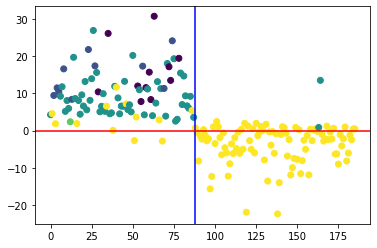

In [39]:
#Q2 Bin (25-50%)
vec = stft_run_half(125,2,63,125)
X = np.asarray(vec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
misc2_q2 = get_misclassified(res)

C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


0.5
0.978494623655914


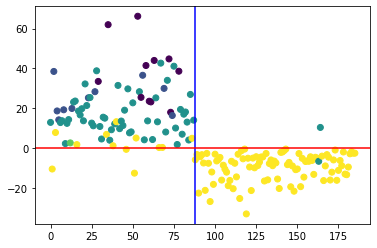

In [40]:
#Q3 Bin (50-75%)
vec = stft_run_half(125,2,125,188)
X = np.asarray(vec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
misc2_q3 = get_misclassified(res)

C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


0.521505376344086
0.946236559139785


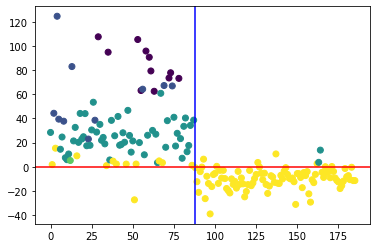

In [41]:
#Q4 Bin (75-100%)
vec = stft_run_half(125,2,188,251)
X = np.asarray(vec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
misc2_q4 = get_misclassified(res)

## Partial Frequencies

C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


(16, 251)
0.5
0.532258064516129


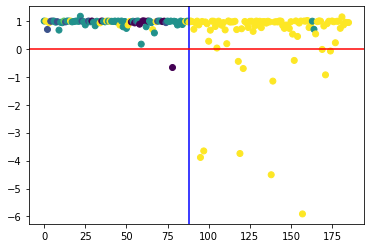

In [42]:
#Freq Lower Half
lfvec,hfvec = stft_run_freq(125,2,8)
X = np.asarray(lfvec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
misc3_lf = get_misclassified(res)

0.510752688172043
0.9838709677419355


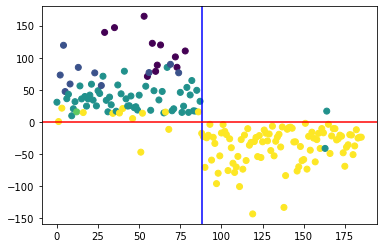

In [43]:
#Frequency Higher Half
X = np.asarray(hfvec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
misc3_hf = get_misclassified(res)

C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


(40, 64)
0.5053763440860215
0.6182795698924731


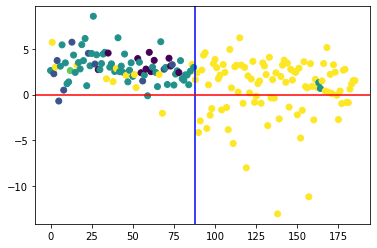

In [44]:
#Freq Div 33/40
lfvec,hfvec = stft_run_freq(50,5,33)
X = np.asarray(lfvec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
misc3_50_5_l33 = get_misclassified(res)

0.521505376344086
0.978494623655914


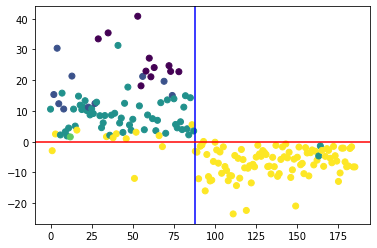

In [45]:
#Freq Div 33-40
X = np.asarray(hfvec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
misc3_50_5_h33 = get_misclassified(res)

C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


(40, 64)
0.5161290322580645
0.6720430107526881


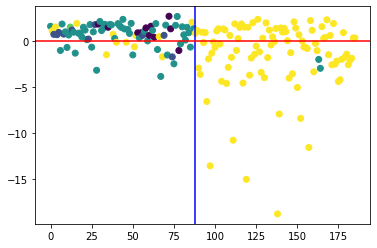

In [46]:
#Freq Div 20/40
lfvec,hfvec = stft_run_freq(50,5,20)
X = np.asarray(lfvec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
misc3_50_5_l20 = get_misclassified(res)

0.4946236559139785
0.9731182795698925


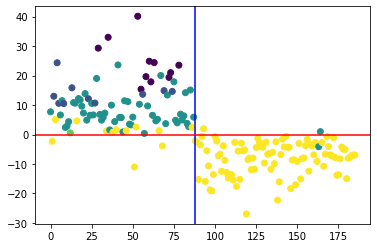

In [47]:
#Freq Div 20-40
X = np.asarray(hfvec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
misc3_50_5_h20 = get_misclassified(res)

C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


(40, 64)
0.5053763440860215
0.7204301075268817


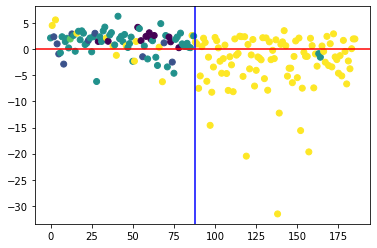

In [48]:
#Freq Div 35/40
lfvec,hfvec = stft_run_freq(50,5,35)
X = np.asarray(lfvec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
misc3_50_5_l35 = get_misclassified(res)

0.5
0.9623655913978495


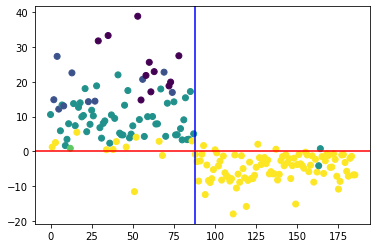

In [49]:
#Freq Div 35-40
X = np.asarray(hfvec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
misc3_50_5_h35 = get_misclassified(res)

C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


(40, 64)
0.4838709677419355
0.6559139784946236


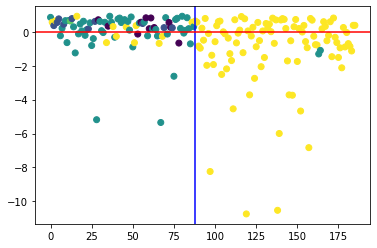

In [50]:
#Freq Div 10/40
lfvec,hfvec = stft_run_freq(50,5,10)
X = np.asarray(lfvec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
misc3_50_5_l10 = get_misclassified(res)

0.4838709677419355
0.967741935483871


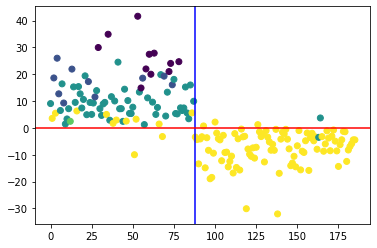

In [51]:
#Freq Div 10-40
X = np.asarray(hfvec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
misc3_50_5_h10 = get_misclassified(res)

## Analyzing Misclassified Points

In [60]:
print('Full')
misc_pts(misc1)
print('Half Bins')
misc_pts(misc2_half)
misc_pts(misc2_half_r)
print('Quarter Bins')
misc_pts(misc2_q1)
misc_pts(misc2_q2)
misc_pts(misc2_q3)
misc_pts(misc2_q4)

print('Frequecies (125,2)')
misc_pts(misc3_lf)
misc_pts(misc3_hf)

print('Frequencies (50,5)')
print('10/40')
misc_pts(misc3_50_5_l10)
misc_pts(misc3_50_5_h10)
print('20/40')
misc_pts(misc3_50_5_l20)
misc_pts(misc3_50_5_h20)
print('33/40')
misc_pts(misc3_50_5_l33)
misc_pts(misc3_50_5_h33)
print('35/40')
misc_pts(misc3_50_5_l35)
misc_pts(misc3_50_5_h35)

Full
[22, 34, 51, 65, 86, 164]
Half Bins
[22, 34, 51, 86, 88, 164]
[34, 51, 86, 164]
Quarter Bins
[51, 86, 88, 115, 116, 129, 132, 142, 143, 149, 159, 164, 165, 166, 168, 172, 178]
[33, 34, 38, 51, 86, 118, 164]
[1, 34, 38, 46, 51, 86, 92, 164]
[34, 51, 86, 93, 121, 126, 127, 128, 135, 137, 143, 144, 163, 164, 179, 181]
Frequecies (125,2)
[22, 59, 78, 88, 89, 90, 91, 92, 93, 94, 96, 98, 99, 101, 102, 103, 104, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 172, 173, 175, 176, 178, 179, 180, 182, 183, 184, 185]
[34, 51, 86, 93, 126, 144, 164]
Frequencies (50,5)
10/40
[10, 67, 75, 78, 88, 89, 92, 93, 94, 96, 98, 99, 100, 101, 102, 103, 105, 106, 108, 109, 110, 112, 114, 115, 116, 118, 120, 122, 123, 125, 126, 129, 130, 131, 132, 133, 134, 135, 136, 137, 140, 141, 

C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


(40, 64)
0.478494623655914
0.967741935483871
[[51, 4], [68, 4], [93, 4], [100, 4], [126, 4], [164, 2]]


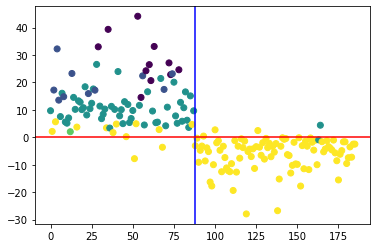

In [52]:
vec = stft_run(50,5)
X = np.asarray(vec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
print(get_misclassified(res))

C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


0.521505376344086
0.967741935483871
[[51, 4], [68, 4], [93, 4], [100, 4], [126, 4], [164, 2]]


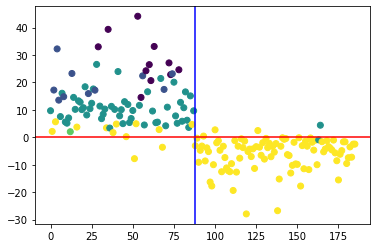

In [53]:
vec = stft_run_half(50,5,0,64)
X = np.asarray(vec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
print(get_misclassified(res))

C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


(40, 64)
0.6612903225806451
0.8817204301075269


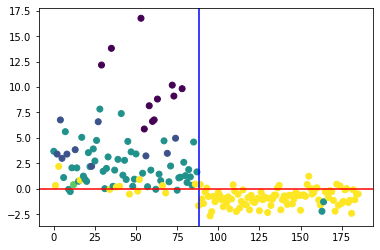

In [29]:
#Freq Div 35/40
fvec = stft_run_freq(50,5,35,40)
X = np.asarray(fvec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
temp = get_misclassified(res)

C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


(40, 64)
0 3200
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
2560
0.521505376344086
0.9731182795698925


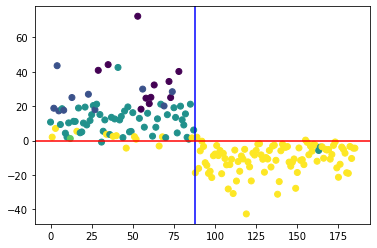

In [39]:
#Freq Div 35/40
fvec = stft_run_freq(50,5,0,50)
X = np.asarray(fvec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
temp = get_misclassified(res)